<a href="https://colab.research.google.com/github/sam2377/DL_Medical_Image_Analysis/blob/master/Code/MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MRI  最簡單版本

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

%matplotlib inline

In [3]:
#Thanks to Luciano Prevedello and Barbaros Selner Erdal.

##First of all, we are going to load the images and labels
from glob import glob
import os
import pandas as pd 
import cv2
import numpy as np

# Now we define the dimensions of our images.

img_width, img_height = 128, 128

files = sorted(glob('/content/gdrive/MyDrive/head_ct/*.png'))

labels = pd.read_csv('/content/gdrive/MyDrive/head_ct/labels.csv')[' hemorrhage'].tolist()

images = np.empty((len(files), img_width, img_height))

for i, _file in enumerate(files):
    images[i, :, :] = cv2.resize(cv2.imread(_file, 0), (img_width, img_height))
    

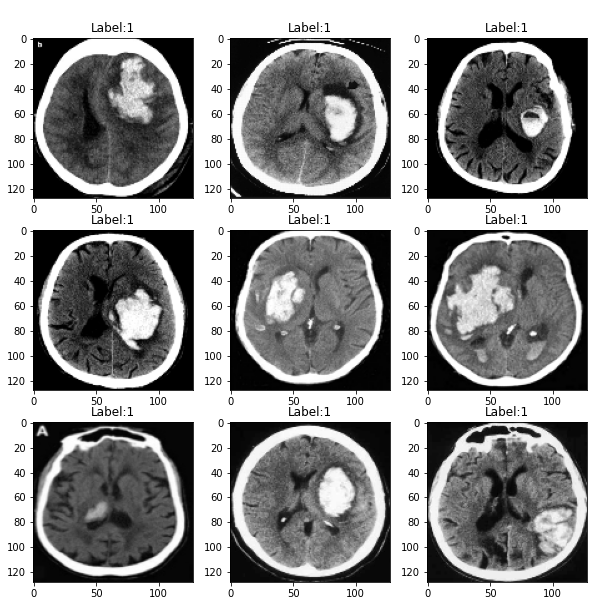

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title("\nLabel:{}".format(labels[i]))
# show the plot
plt.show()

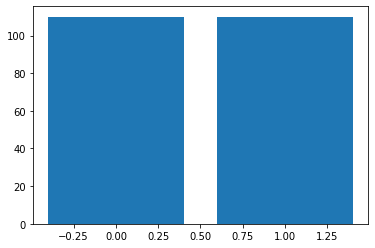

In [5]:
dum = plt.bar(labels, 110)

In [6]:
#Now we split the dataset into train (80%), validation (10%) and test (10%) sets.
from sklearn.model_selection import train_test_split
import numpy as np

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=1)
val_images, test_images, val_labels, test_labels = train_test_split(test_images, test_labels, test_size=0.5, random_state=1)

print((len(train_images), len(val_images), len(test_images)))

(160, 20, 20)


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import backend as K

input_shape = (128, 128, 1)

# SIIM_custom_model = None

SIIM_custom_model = Sequential()
SIIM_custom_model.add(Conv2D(32, (3, 3), input_shape=input_shape))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))
SIIM_custom_model.add(Conv2D(32, (3, 3)))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))
SIIM_custom_model.add(Conv2D(64, (3, 3)))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(MaxPooling2D(pool_size=(2, 2)))
SIIM_custom_model.add(Flatten())
SIIM_custom_model.add(Dense(64))
SIIM_custom_model.add(Activation('relu'))
SIIM_custom_model.add(Dropout(0.5))
SIIM_custom_model.add(Dense(1))
SIIM_custom_model.add(Activation('sigmoid'))
SIIM_custom_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [12]:
from numpy.random import seed
seed(1337)
tf.random.set_seed(1337)

import warnings
warnings.filterwarnings('ignore')

nb_train_samples = len(train_images)
nb_validation_samples = len(val_images)
epochs = 100
batch_size = 10

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.0,
    zoom_range=0.1,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# this is the augmentation configuration we will use for validation:
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(train_images[..., np.newaxis], 
              train_labels, 
              batch_size = batch_size)
validation_generator = val_datagen.flow(
    val_images[..., np.newaxis],
    val_labels,
    batch_size=batch_size)


In [13]:
history = SIIM_custom_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/100
16/16 [==============================] - 28s 40ms/step - loss: 0.7699 - accuracy: 0.6000 - val_loss: 0.6989 - val_accuracy: 0.3500
Epoch 2/100
16/16 [==============================] - 0s 29ms/step - loss: 0.6944 - accuracy: 0.5125 - val_loss: 0.6714 - val_accuracy: 0.7000
Epoch 3/100
16/16 [==============================] - 0s 29ms/step - loss: 0.6755 - accuracy: 0.5875 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 26ms/step - loss: 0.6583 - accuracy: 0.6000 - val_loss: 0.5917 - val_accuracy: 0.7000
Epoch 5/100
16/16 [==============================] - 0s 28ms/step - loss: 0.6401 - accuracy: 0.7188 - val_loss: 0.6403 - val_accuracy: 0.6000
Epoch 6/100
16/16 [==============================] - 0s 29ms/step - loss: 0.5894 - accuracy: 0.6875 - val_loss: 0.5529 - val_accuracy: 0.7500
Epoch 7/100
16/16 [==============================] - 0s 27ms/step - loss: 0.6075 - accuracy: 0.7188 - val_loss: 0.5245 - val_accuracy: 0.7500
Epoch

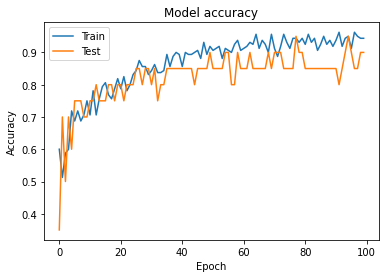

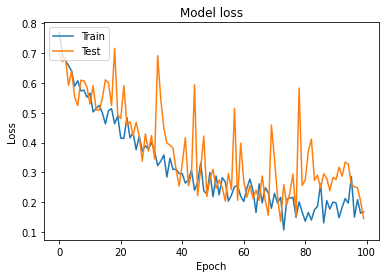

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
prediction = (SIIM_custom_model.predict(test_images[..., np.newaxis] / 255.))
prediction = (prediction > 0.5).astype("int32")
score = 0.0
predict = prediction.tolist()
for i in range(len(predict)):
  predict[i]=predict[i][0]

for i, j in zip(predict, test_labels):
  if i==j:
    score = score+1.0
score = score/len(predict)
print(len(predict), score)
print(predict)
print(test_labels)
# print("Accuracy: " + str(SIIM_custom_model.predict(test_images[..., np.newaxis] / 255., test_labels)[1] * 100) + "%")

20 0.95
[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
